## Task 1

1. Write Python code to plot three Poisson distributions, eqn(1), for ⟨n⟩= 1, 5, 10.

Poisson Distribution given by,

 $P(n)=\frac{\langle n \rangle}{n!}^ne^{-\langle n \rangle}$, $\langle n \rangle=\Sigma^{N}_{n=0}nP(n)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

In [2]:
'''def factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)'''

def avg_n(N,L):
    avg_n_val=N*(1/L)
    return avg_n_val

'''def p(n, mean_n):                                                  #This method overflows for large n, creating negative probabilities, was replaced with log-space version below
    """Calculate Poisson probability P(n) directly from mean_n"""
    if n > 100:  # factorial overflow protection
        return 0
    else:
        prob = ((mean_n**n) / factorial(n)) * np.exp(-mean_n)
        return prob'''


from scipy.special import gammaln
import numpy as np

def p(n, mean_n):
    """Calculate Poisson probability in log-space to avoid overflow"""
    # Work entirely in log space
    log_prob = n * np.log(mean_n) - mean_n - gammaln(n + 1)
    prob = np.exp(log_prob)
    
    # Clamp to zero if negative due to numerical error
    if not np.isfinite(prob):
        return 0.0
    return max(0.0, prob)


[np.float64(0.36787944117144233), np.float64(0.36787944117144233), np.float64(0.18393972058572114), np.float64(0.06131324019524039), np.float64(0.015328310048810101), np.float64(0.00306566200976202), np.float64(0.0005109436682936698), np.float64(7.299195261338139e-05), np.float64(9.123994076672672e-06), np.float64(1.013777119630298e-06), np.float64(1.0137771196302987e-07), np.float64(9.216155633002698e-09), np.float64(7.680129694168904e-10), np.float64(5.907792072437641e-11), np.float64(4.219851480312585e-12), np.float64(2.813234320208399e-13), np.float64(1.7582714501302425e-14), np.float64(1.0342773236060258e-15), np.float64(5.745985131144604e-17), np.float64(3.0242027006024186e-18), np.float64(1.51210135030121e-19), np.float64(7.200482620481905e-21), np.float64(3.272946645673604e-22), np.float64(1.423020280727654e-23), np.float64(5.929251169698581e-25), np.float64(2.3717004678794192e-26), np.float64(9.121924876459356e-28), np.float64(3.378490694984971e-29), np.float64(1.2066038196374

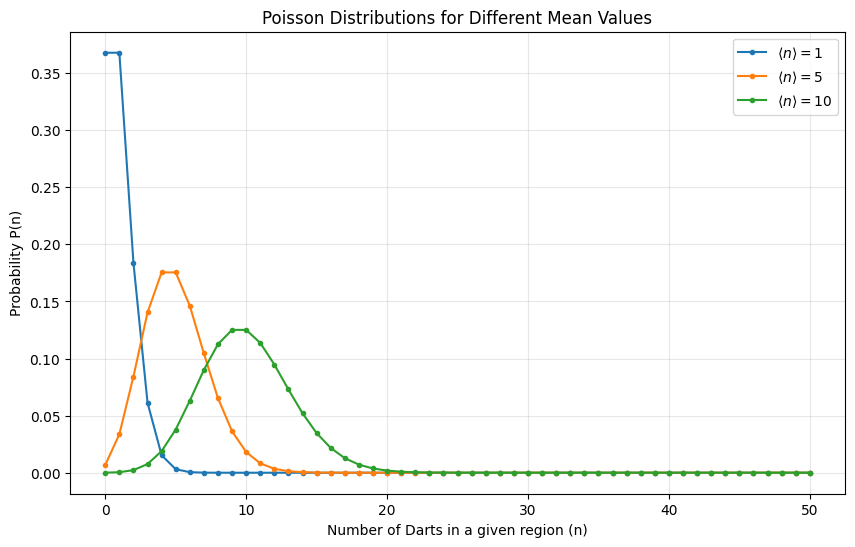

In [3]:
mean_n_values = [1, 5, 10]
N_max = 50  # Maximum n to consider

plt.figure(figsize=(10, 6))

for mean_n in mean_n_values:
    ns = np.arange(0, N_max + 1)  # Start from 0!
    p_values = [p(n, mean_n) for n in ns]
    
    plt.plot(ns, p_values, label=f'$\\langle n \\rangle = {mean_n}$', marker='o', markersize=3)
    print(p_values)

plt.title('Poisson Distributions for Different Mean Values')
plt.xlabel('Number of Darts in a given region (n)')
plt.ylabel('Probability P(n)')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Part-1/Assignments/Comp_Sim_Assignment_4/plots/task1.pdf')
plt.show()

## Task 2

2. Set N = 50 (to avoid large numbers for the factorial) and write code to compute the sums of $\Sigma^{N}_{n=0}P(n)$, $\Sigma^{N}_{n=0}nP(n)$ and $\Sigma^{N}_{n=0}n**2P(n)$ for the three different values of ⟨n⟩ given above. Verify that $P(n)$ is normalized. What are the values of
the standard deviation and variance? Present all your results in a table.

**Check Moments**

In [4]:
# %%
def zero_moment(p_values):
    """Check if the probabilities sum to 1."""
    return np.sum(p_values)

def first_moment(ns, p_values):
    """Calculate mean: Σ n*P(n)"""
    return np.sum(ns * p_values)

def second_moment(ns, p_values):
    """Calculate second moment: Σ n²*P(n)"""
    return np.sum((ns**2) * p_values)

def var_check(ns, p_values):
    """Calculate variance: E[n²] - E[n]²"""
    mean_val = first_moment(ns, p_values)
    second_mom = second_moment(ns, p_values)
    return second_mom - mean_val**2

In [5]:
N = 50  # As specified in the question
mean_n_values = [1, 5, 10]

total_probs = []
mean_vals = []
second_moments = []
variance_vals = []
std_devs = []

for mean_n in mean_n_values:
    ns = np.arange(0, N + 1)  # n from 0 to N
    p_values = np.array([p(n, mean_n) for n in ns])
    
    total_prob = zero_moment(p_values)
    mean_val = first_moment(ns, p_values)
    second_mom = second_moment(ns, p_values)
    variance_val = var_check(ns, p_values)
    std_dev = np.sqrt(variance_val)
    
    total_probs.append(total_prob)
    mean_vals.append(mean_val)
    second_moments.append(second_mom)
    variance_vals.append(variance_val)
    std_devs.append(std_dev)

# %%
# Create results table
import pandas as pd

results_df = pd.DataFrame({
    '⟨n⟩': mean_n_values,
    'Σ P(n)': total_probs,
    'Σ n·P(n)': mean_vals,
    'Σ n²·P(n)': second_moments,
    'Variance': variance_vals,
    'Std Dev': std_devs
})

print("\n" + "="*80)
print("TASK 2 RESULTS: Poisson Distribution Properties (N=50)")
print("="*80)
print(results_df.to_string(index=False))
print("="*80)

# Verify results
print("\nVerification:")
for i, mean_n in enumerate(mean_n_values):
    print(f"\n⟨n⟩ = {mean_n}:")
    print(f"  Normalized? {abs(total_probs[i] - 1.0) < 1e-6} (sum = {total_probs[i]:.6f})")
    print(f"  Mean matches? {abs(mean_vals[i] - mean_n) < 1e-6} (calculated = {mean_vals[i]:.6f})")
    print(f"  Variance = ⟨n⟩? {abs(variance_vals[i] - mean_n) < 1e-2} (calculated = {variance_vals[i]:.6f})")



TASK 2 RESULTS: Poisson Distribution Properties (N=50)
 ⟨n⟩  Σ P(n)  Σ n·P(n)  Σ n²·P(n)  Variance  Std Dev
   1     1.0       1.0        2.0       1.0 1.000000
   5     1.0       5.0       30.0       5.0 2.236068
  10     1.0      10.0      110.0      10.0 3.162278

Verification:

⟨n⟩ = 1:
  Normalized? True (sum = 1.000000)
  Mean matches? True (calculated = 1.000000)
  Variance = ⟨n⟩? True (calculated = 1.000000)

⟨n⟩ = 5:
  Normalized? True (sum = 1.000000)
  Mean matches? True (calculated = 5.000000)
  Variance = ⟨n⟩? True (calculated = 5.000000)

⟨n⟩ = 10:
  Normalized? True (sum = 1.000000)
  Mean matches? True (calculated = 10.000000)
  Variance = ⟨n⟩? True (calculated = 10.000000)


## Task 3

3. Write a Python program to simulate the dart problem. Throw N = 50 darts at
random in one trial (i.e. choose N = 50 integer random numbers) and initially
set the number of regions to L = 100. Run T = 10 such “experiments” and
determine H(n), the number of regions that have n darts, and the mean number
of darts per region, ⟨n⟩. Normalize H(n) to determine the probability distribu-
tion, Psim(n) of eqn.(2). Plot Psim(n) as obtained from your data and compare
it with the Poisson distribution of eqn.(1), where you need to use your value of
⟨n⟩from your simulation as input.

In [6]:
def simulate_dart_throws(N, L, T):
    # Initialize histogram (max possible darts in one region is N)
    H = np.zeros(N + 1)
    
    for trial in range(T):
        # Create dartboard with L regions
        board = np.zeros(L, dtype=int)
        
        # Throw N darts randomly
        for dart in range(N):
            region = np.random.randint(0, L)  # Pick random region
            board[region] += 1  # Dart lands in that region
        
        # Count how many regions have 0, 1, 2, ... darts
        for n in range(N + 1):
            H[n] += np.sum(board == n)  # Count regions with exactly n darts
    
    # Calculate mean from simulation
    mean_n = N / L  # Theoretical mean
    
    return H/T, mean_n


#H, mue = simulate_dart_throws(N, L, T)

In [7]:
N=50
L=100
T=10

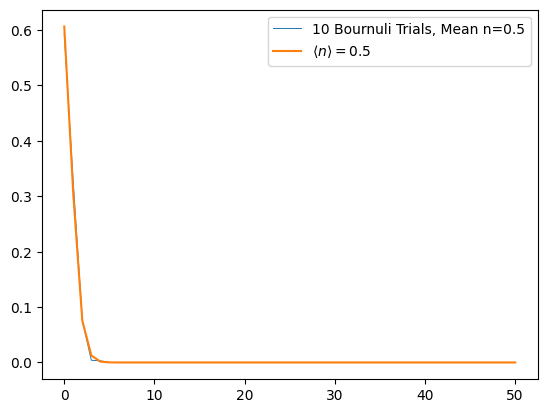

In [8]:
Ts = [10]
Ns = np.arange(N+1)
for T in Ts:

    H, mean_n = simulate_dart_throws(N, L, T)

    H = H/np.sum(H)

    plt.plot(Ns,H, linewidth=0.7, label = f"{T} Bournuli Trials, Mean n={mean_n}")

p_values1 = [p(n, mean_n) for n in ns]

plt.plot(ns, p_values1, label=f'$\\langle n \\rangle = {mean_n}$', markersize=3)
plt.legend()
plt.show()

## Task 4

4. Plot both distributions using a log-scale for the vertical axis. Down to what
values of P(n) does your numerical data probe the Poisson distribution?

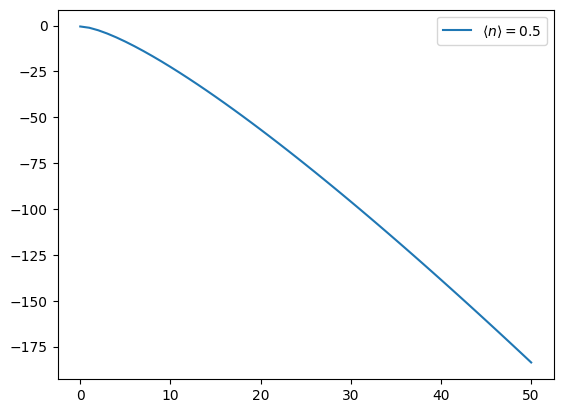

In [9]:
plt.plot(ns, np.log(p_values1), label=f'$\\langle n \\rangle = {mean_n}$', markersize=3)
plt.legend()
plt.show()

## Task 5

5. Repeat the simulations for a different number of trials, T = 100, 1000, and
10000, and record the smallest values of P (n) that you can simulate.

In [10]:
def find_min_positive(arr):
    """Find the smallest positive value in an array."""
    positive_values = arr[arr > 0]
    if len(positive_values) > 0:
        return positive_values.min()
    else:
        return None  # No positive values found

For T=10: 0.004
For T=100: 0.00010000000000000002
For T=1000: 1e-05
For T=10000: 1.3e-05


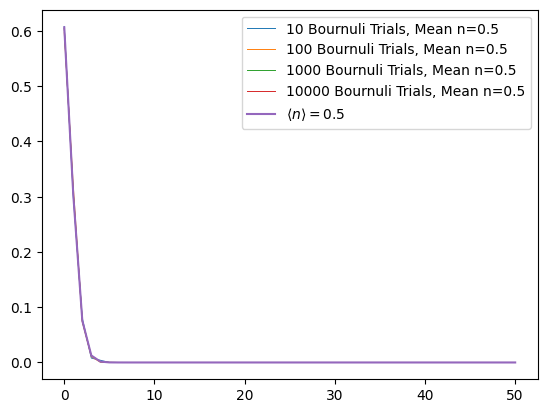

In [11]:
Ts = [10, 100, 1000, 10000]
Ns = np.arange(N+1)
for T in Ts:

    H, mean_n = simulate_dart_throws(N, L, T)

    H = H/np.sum(H)

    plt.plot(Ns,H, linewidth=0.7, label = f"{T} Bournuli Trials, Mean n={mean_n}")
    print(f"For T={T}:", find_min_positive(H))

p_values1 = [p(n, mean_n) for n in ns]

plt.plot(ns, p_values1, label=f'$\\langle n \\rangle = {mean_n}$', markersize=3)
plt.legend()
plt.show()

## Task 6

6. Repeat these calculations for L = 5, N = 50 and T = 10, 1000, 10000. What
do you observe?

For T=10: 0.02
For T=100: 0.002
For T=1000: 0.0002
For T=10000: 2e-05


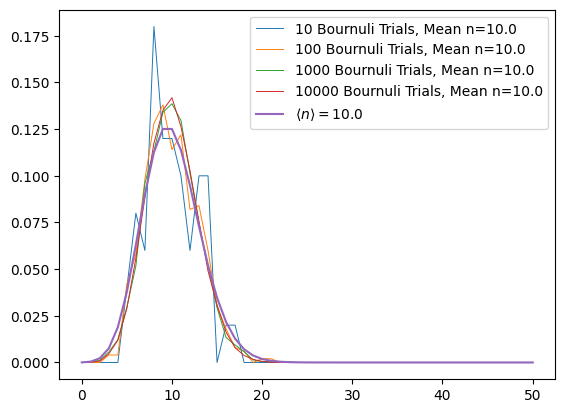

In [12]:
Ts = [10, 100, 1000, 10000]
N=50
L=5
Ns = np.arange(N+1)
for T in Ts:

    H, mean_n = simulate_dart_throws(N, L, T)

    H = H/np.sum(H)

    plt.plot(Ns,H, linewidth=0.7, label = f"{T} Bournuli Trials, Mean n={mean_n}")
    print(f"For T={T}:", find_min_positive(H))

p_values1 = [p(n, mean_n) for n in ns]

plt.plot(ns, p_values1, label=f'$\\langle n \\rangle = {mean_n}$', markersize=3)
plt.legend()
plt.show()